## Get data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

#!pip install keras
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#!pip install fbprophet
#!pip install tqdm
from fbprophet import Prophet
from tqdm import tqdm

#!pip install imapclient
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from fbprophet import Prophet
import imapclient
import pandas as pd

Using TensorFlow backend.


In [2]:
#Get Data
df2 = pd.read_csv('tick.csv')

#Rename two columns I needed
df2.rename(columns={'3':'Dates'},inplace=True)
df2.rename(columns={'17':'Tick_Street_Name'},inplace=True)

#convert date into datetime type 
df2['date_column'] = pd.to_datetime(df2['Dates'],format ='%m/%d/%Y')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
# #Getting data for Mission Street only 
# Mission_Street = df2[df2['Tick_Street_Name'] == 'MISSION']
# Mission_Street = Mission_Street['Tick_Street_Name']
#7052 null values in MISSION STREET

#df2[df2['Tick_Street_Name'] == 'GEARY']


In [16]:
df2['street_total'] = df2['Tick_Street_Name'].value_counts()

In [17]:
df2['street_total']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
           ..
2895471   NaN
2895472   NaN
2895473   NaN
2895474   NaN
2895475   NaN
2895476   NaN
2895477   NaN
2895478   NaN
2895479   NaN
2895480   NaN
2895481   NaN
2895482   NaN
2895483   NaN
2895484   NaN
2895485   NaN
2895486   NaN
2895487   NaN
2895488   NaN
2895489   NaN
2895490   NaN
2895491   NaN
2895492   NaN
2895493   NaN
2895494   NaN
2895495   NaN
2895496   NaN
2895497   NaN
2895498   NaN
2895499   NaN
2895500   NaN
Name: street_total, Length: 2895501, dtype: float64

In [66]:
street_count = df2[['Tick_Street_Name', 'year_daily']].groupby(['Tick_Street_Name']).agg(['count'])

In [71]:
street_count

,year_daily
,count
Tick_Street_Name,
!,6
! ST JOSEPHS,1
! CASTRO,1
! CHESTNUT,1
! DETROIT,1
! EDDY,1
! JACKSON,2
! JULIAN,1


In [15]:
#create a new column 'daily'
df2['daily'] = df2['date_column'].apply(lambda x: pd.Timestamp(x).day)
df2['daily'].max()

df2['daily'] = df2['daily'].apply(int).apply(str)

#create a new column 'year'
df2['year'] = df2['date_column'].apply(lambda x: pd.Timestamp(x).year)
df2['year'] = df2['year'].apply(int).apply(str)

#create a new column 'month'
df2['month'] = df2['date_column'].apply(lambda x: pd.Timestamp(x).month)
df2['month'] = df2['month'].apply(int).apply(str)

In [16]:
#check the largest month
max(df2['month'], key=(lambda x: int(x)))

'12'

In [17]:
#combined year and month and weekly to get daily per year
df2['year_daily']= df2['year'] + '-' + df2['month'] + '-' + df2['daily']
#count all the values daily per year
data_daily = df2['year_daily'].value_counts().sort_index()

In [18]:
data_daily

2016-10-1     1942
2016-10-10    1711
2016-10-11    4305
2016-10-12    4973
2016-10-13    4726
2016-10-14    4600
2016-10-15    1747
2016-10-16    1016
2016-10-17    4500
2016-10-18    4915
2016-10-19    4685
2016-10-2     1375
2016-10-20    4453
2016-10-21    4414
2016-10-22    1661
2016-10-23    1072
2016-10-24    4428
2016-10-25    5030
2016-10-26    5025
2016-10-27    4770
2016-10-28    4186
2016-10-29    1828
2016-10-3     4197
2016-10-30    1284
2016-10-31    3173
2016-10-4     4665
2016-10-5     4842
2016-10-6     5089
2016-10-7     4537
2016-10-8     1625
              ... 
2018-8-10     4570
2018-8-11     1607
2018-8-12     1241
2018-8-13     4532
2018-8-14     5025
2018-8-15     4950
2018-8-16     5139
2018-8-17     4641
2018-8-18     1831
2018-8-19     1035
2018-8-2      4911
2018-8-20     4726
2018-8-21     5392
2018-8-22     4709
2018-8-23     5005
2018-8-24     4486
2018-8-25     1473
2018-8-26     1130
2018-8-27     4276
2018-8-28     4365
2018-8-29     3558
2018-8-3    

In [21]:
#sum of counts of tickets
print(len(data_daily))

792


In [22]:
#reasign another variable for "putting together" graph problem
day = df2['year_daily']
day.head()

0    2016-7-1
1    2016-7-1
2    2016-7-1
3    2016-7-1
4    2016-7-1
Name: year_daily, dtype: object

## Baseline Model

In [36]:
test_split = int(len(data_daily) * 0.8)

pred_base = []
for i in range(len(data_daily) - test_split):
    train_data = data_daily[i : test_split + i]

    test_data = data_daily.iloc[test_split + i]
   
    train_data_day = (
        train_data.values.sum() / train_data.count()
    )
    
    #baseline_prediction = train_data_day[:test_data]
    pred_base.append(train_data_day)
    
test_data = data_daily[test_split:]

mse_baseline = mean_squared_error(test_data.values, pred_base)

print("RMSE for BASELINE {:.2f}".format(np.sqrt(mse_baseline)))

RMSE for BASELINE 1504.22


In [37]:
print(len(train_data))

633


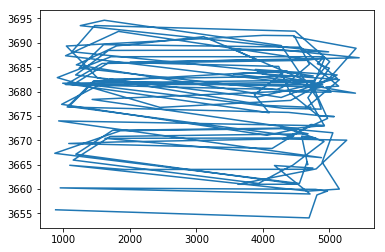

In [38]:
plt.plot(test_data.values, pred_base)

### Dropout can be applied to the input connection within the LSTM nodes.

### A dropout on the input means that for a given probability, the data on the input connection to each LSTM block 
### will be excluded from node activation and weight updates.

## Keras LSTM Model

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 633 samples, validate on 152 samples
Epoch 1/15
 - 6s - loss: 0.1565 - acc: 0.0016 - val_loss: 0.0765 - val_acc: 0.0000e+00
Epoch 2/15
 - 1s - loss: 0.0983 - acc: 0.0016 - val_loss: 0.0724 - val_acc: 0.0000e+00
Epoch 3/15
 - 1s - loss: 0.0906 - acc: 0.0016 - val_loss: 0.0672 - val_acc: 0.0000e+00
Epoch 4/15
 - 1s - loss: 0.0839 - acc: 0.0016 - val_loss: 0.0619 - val_acc: 0.0000e+00
Epoch 5/15
 - 1s - loss: 0.0799 - acc: 0.0016 - val_loss: 0.0564 - val_acc: 0.0000e+00
Epoch 6/15
 - 1s - loss: 0.0741 - acc: 0.0016 - val_loss: 0.0527 - val_acc: 0.0000e+00
Epoch 7/15
 - 1s - loss: 0.0737 - acc: 0.0016 - val_loss: 0.0494 - val_acc: 0.0000e+00
Epoch 8/15
 - 1s - loss: 0.0750 - acc: 0.0016 - val_loss: 0.0479 - val_acc: 0.0000e+00
Epoch 9/15
 - 1s - loss: 0.0696 - acc: 0.0016 - val_loss: 0.0472 - val_acc: 0.0000e+00
Epoch 10/15
 - 1s - loss: 0.0709 - acc: 0.0016 - val_loss: 0.0463 - val_acc: 0.0000e+00
Epoch 11/15
 - 1s - loss: 0.0716 - acc: 0.0016 - val_loss: 0.0461 - val_acc: 0.0000

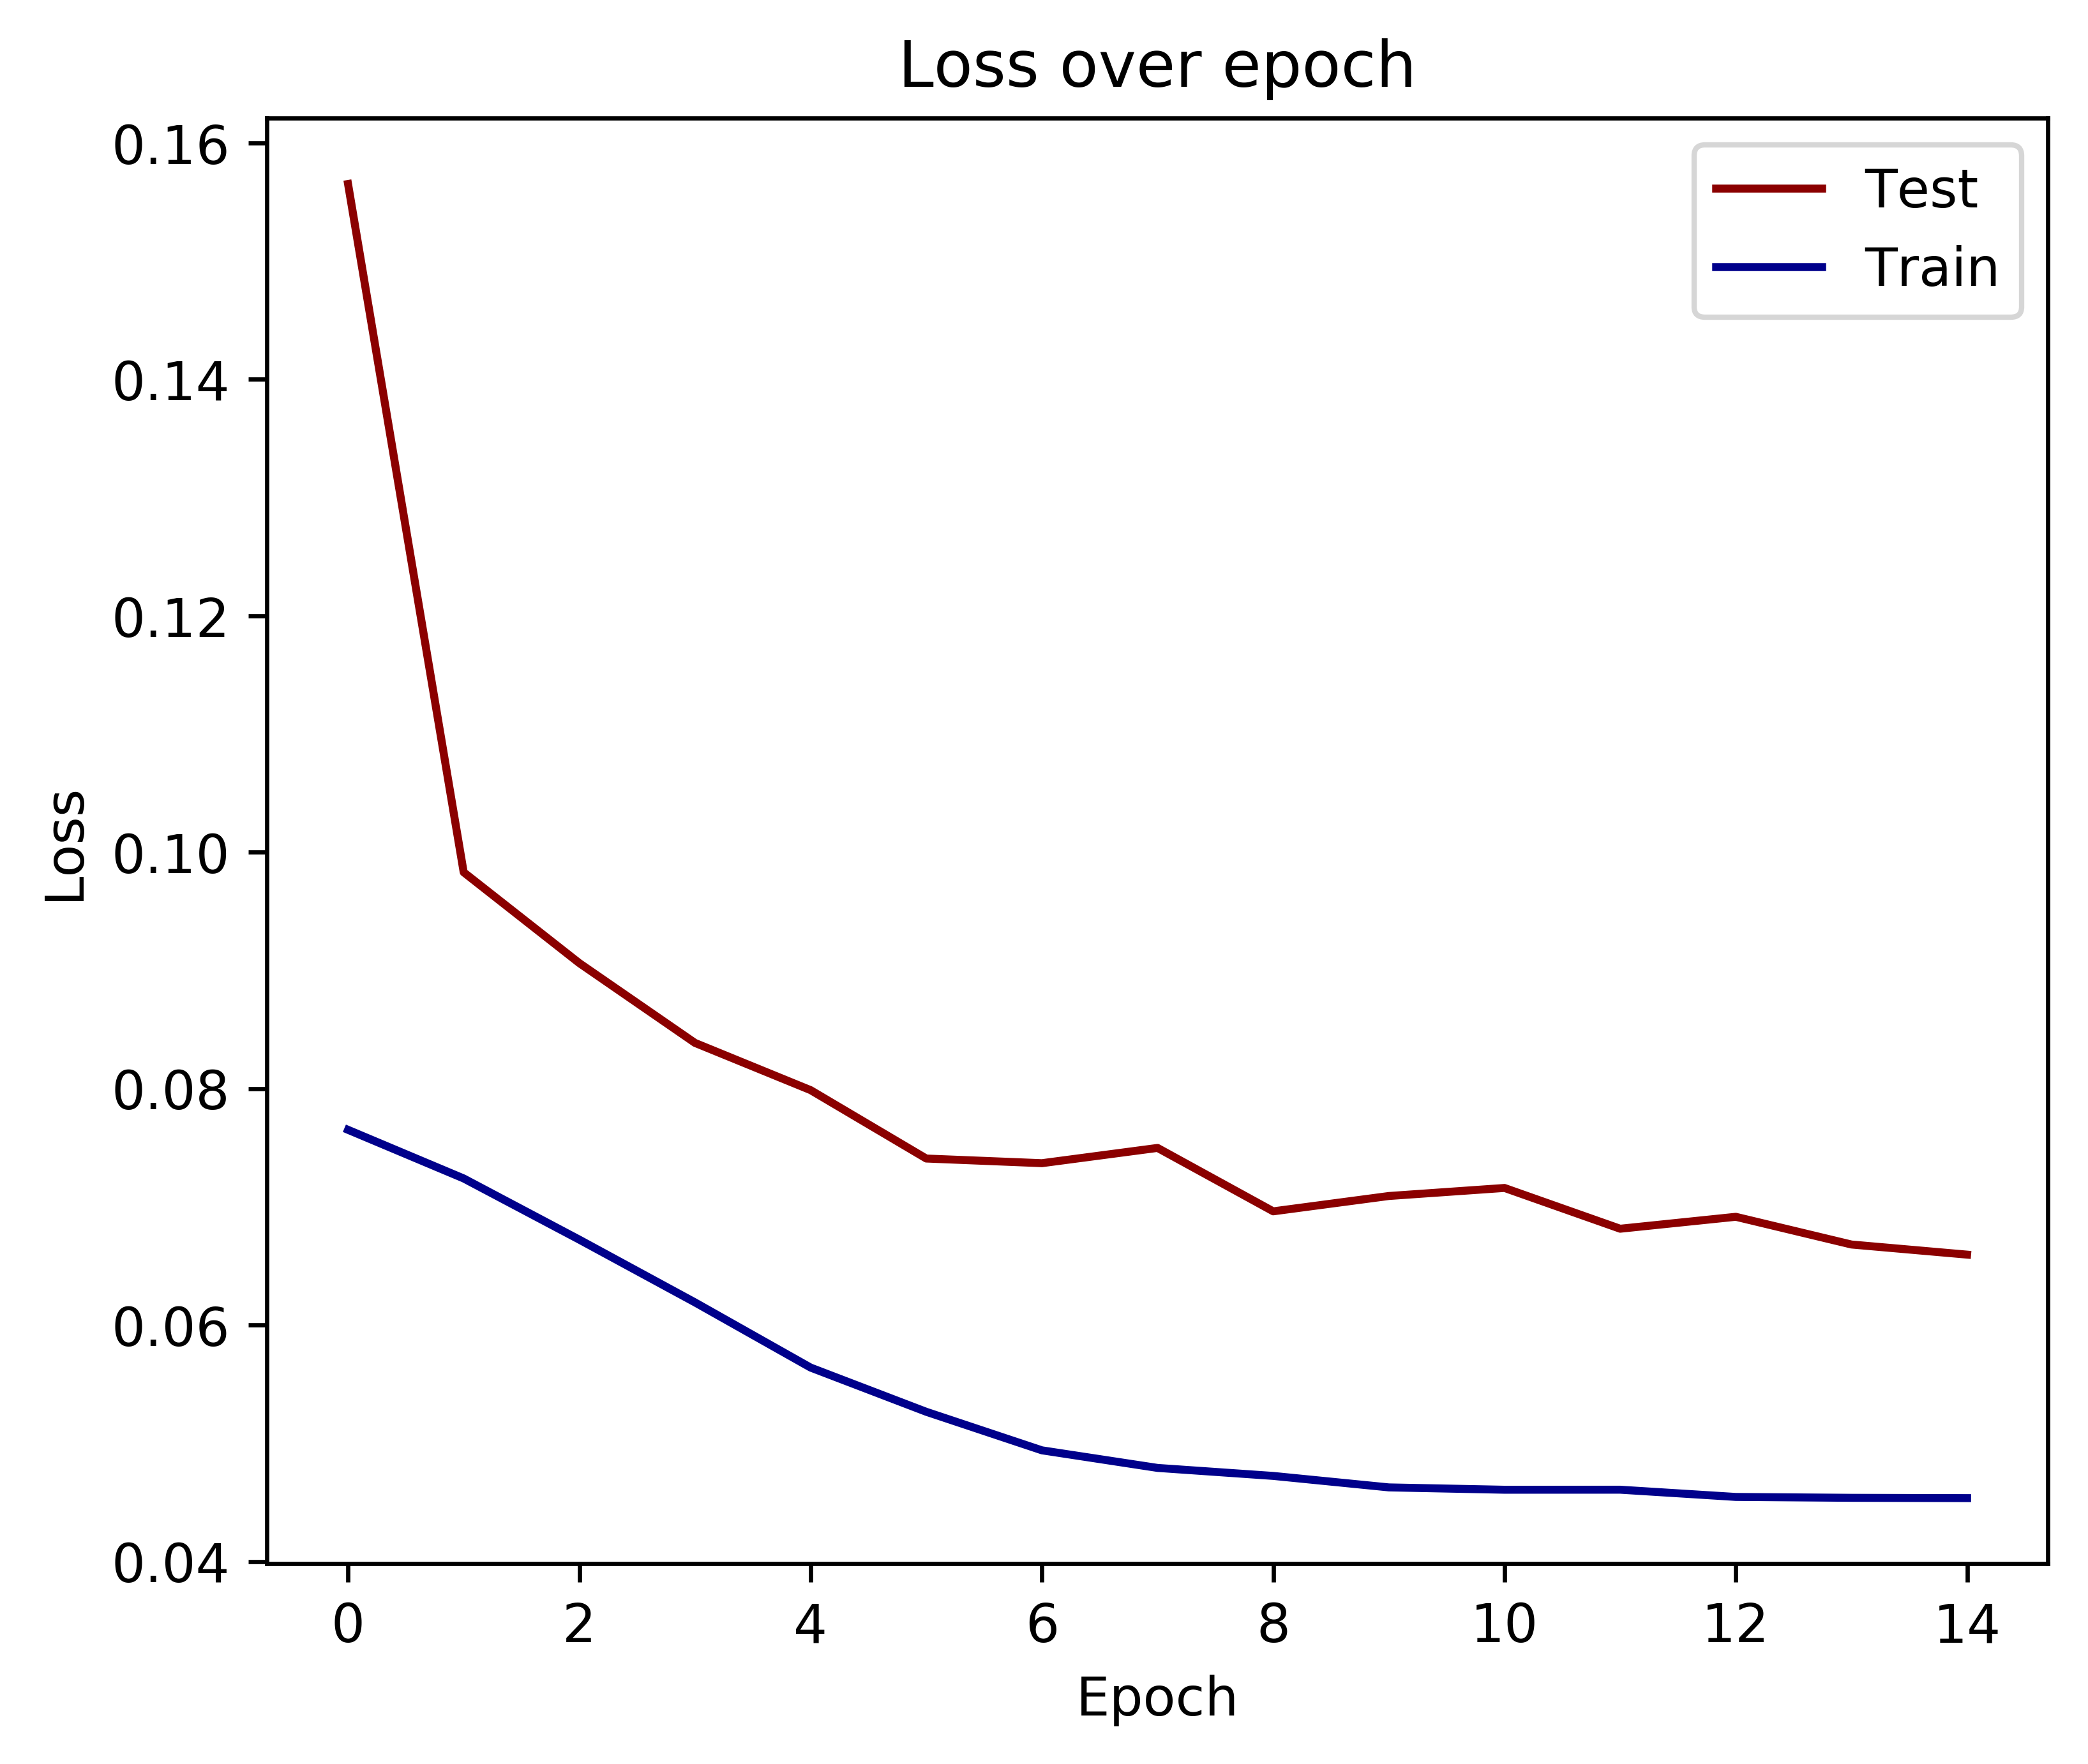

RMSE for LSTM 1198.64


In [57]:
#predicting total number of parking ticket weekly, window_size=7

def get_window_data(data, window):
    # Get window data and scale
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data_daily.reshape(-1, 1))

    X = []
    y = []

    for i in range(len(data) - window):
        X.append(data[i : i + window])
        y.append(data[i + window])

    X = np.asarray(X)
    y = np.asarray(y)
    return X, y, scaler

window_size = 7
X, y, scaler = get_window_data(data_daily, window_size)

X_train = X[:test_split]
X_test = X[test_split:]

y_train = y[:test_split]
y_test = y[test_split:]

model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(
    X_train, # Features
    y_train, # Target
    epochs=15, # Number of epochs
    batch_size=7, # Number of observations per batch
    validation_data=(X_test, y_test), # Data for evaluation
    verbose=2, # 2 output
    shuffle= False
)

# # summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# Plot training & validation loss values
plt.figure(figsize=(6, 5), dpi=600)
plt.plot(history.history["loss"], 'darkred', label="Test")
plt.plot(history.history["val_loss"], 'darkblue', label="Train")
plt.title("Loss over epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


mse_lstm = mean_squared_error(
    scaler.inverse_transform(y_test),
    scaler.inverse_transform(model.predict(X_test)),
)
print("RMSE for LSTM {:.2f}".format(np.sqrt(mse_lstm)))
#print(model.summary())

### The Loss over Epoch graph shows Training data is to be more fit with real data, thus showing lower loss score. Testing data are less fit with real data, thus high loss score.

## Prophet Model

In [11]:
prophet_data = data_daily.reset_index()

prophet_data["ds"] = prophet_data['index']
#daily
prophet_data["y"] = prophet_data['year_daily']
#number of tickets
prophet_data = prophet_data.drop(['index', 'year_daily'], axis=1)

pred = []
for i in tqdm(range(len(data_daily) - test_split)):

    data_to_fit = prophet_data[: (test_split + i)]
    
    prophet_model = Prophet(interval_width=0.95)

    prophet_model.fit(data_to_fit)

    prophet_forecast = prophet_model.make_future_dataframe(periods=1, freq="d")
    prophet_forecast = prophet_model.predict(prophet_forecast)

    pred.append(prophet_forecast["yhat"].iloc[-1])


mse_prophet = mean_squared_error(test_data.values, pred)

print("RMSE for PROPHET {:.2f}".format(np.sqrt(mse_prophet)))


  0%|          | 0/159 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  1%|          | 1/159 [00:02<07:15,  2.76s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  1%|▏         | 2/159 [00:05<07:12,  2.76s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
  2%|▏         | 3/159 [00:08<07:09,  2.75s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override th

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 21%|██        | 33/159 [01:31<05:54,  2.81s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 21%|██▏       | 34/159 [01:34<05:50,  2.80s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 22%|██▏       | 35/159 [01:37<05:46,  2.79s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 23%|██▎       | 36/159 [01:40<05:49,  2.84s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to

 41%|████      | 65/159 [03:02<04:26,  2.83s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 42%|████▏     | 66/159 [03:05<04:26,  2.87s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 42%|████▏     | 67/159 [03:08<04:23,  2.87s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 43%|████▎     | 68/159 [03:11<04:20,  2.86s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
 95%|█████████▍| 151/159 [07:33<00:26,  3.32s/it]INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


100%|██████████| 159/159 [08:00<00:00,  3.36s/it]

RMSE for PROPHET 1380.36


## Plot baseline and Keras LSTM graphs

### Given all the learned parameters from train data, we are using them to predict on all the test sequences one at a time.

In [60]:
plt.scatter(history.history)

#we now plot predictions from the network
plt.figure(figsize=(16, 7))
plt.title('Ticket Counts from Jun. 2016 to Jul. 2018')
plt.xlabel('Daily')
plt.ylabel('Scaled Number of Tickets')
plt.plot(scaled_data, label='Original data')
plt.plot(sup, label='Training data')
plt.plot(test_results, label='Testing data')
plt.legend()
plt.show()

# one for prophet oneplot 
# one for LSTM oneplot
#len(pred), len(data_daily), len(test_data)

TypeError: scatter() missing 1 required positional argument: 'y'

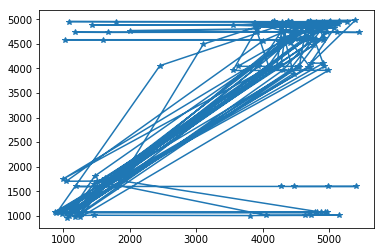

In [63]:
plt.plot(test_data, pred, '-*')

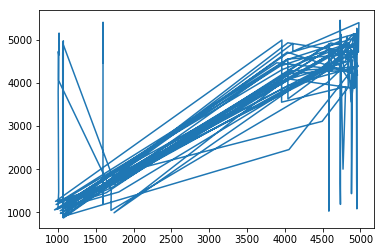

In [65]:
plt.plot(pred, test_data.values)

## Plot Mission Street and Geary Street Total number of parking ticket

In [ ]:
# data_to_fit = prophet_data[: (test_split + i)]
# print(prophet_data)

# prophet_model = Prophet(interval_width=0.95)

# prophet_model.fit(data_to_fit)

# prophet_forecast = prophet_model.make_future_dataframe(periods=1, freq="d")
# prophet_forecast = prophet_model.predict(prophet_forecast)

# pred.append(prophet_forecast["yhat"].iloc[-1])



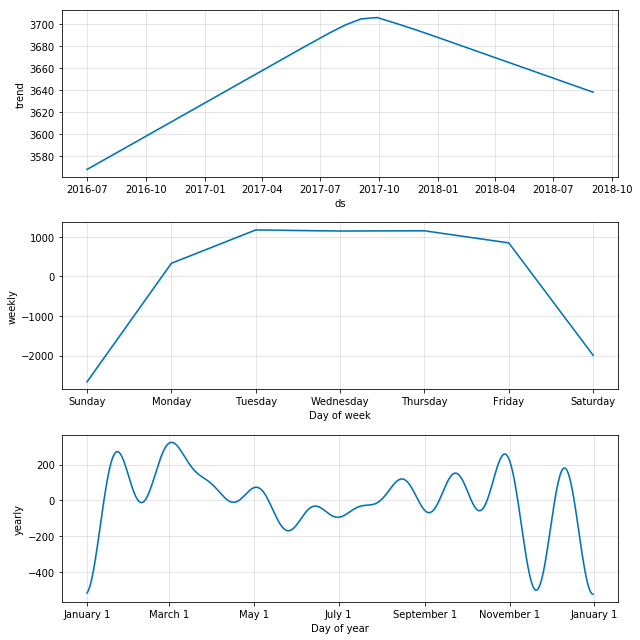

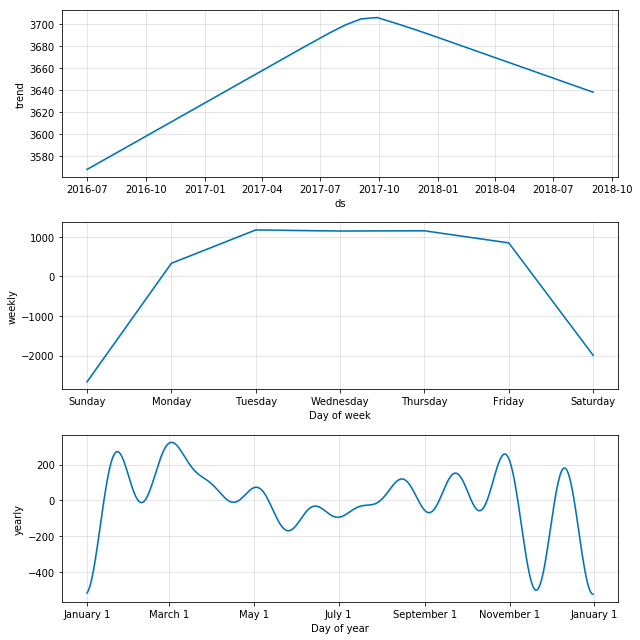

In [14]:
#for performance_metrics exploration 
from fbprophet.diagnostics import performance_metrics
prophet_model.plot_components(prophet_forecast)

## Exploration: Putting it all together

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


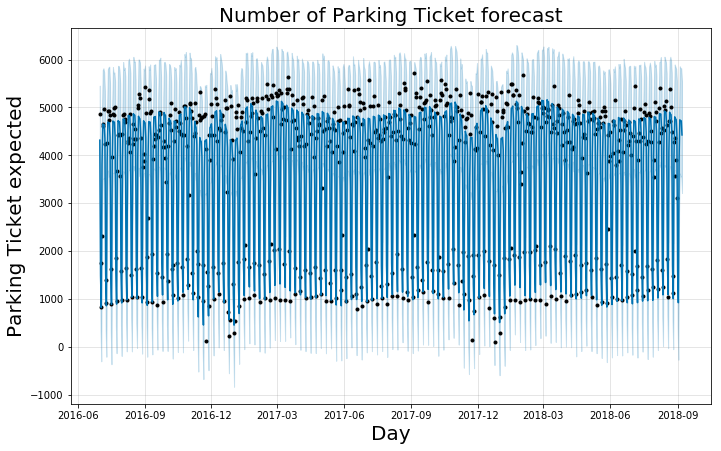

In [62]:
prophet_model = Prophet(interval_width=0.95)

prophet_data = data_daily[:100].reset_index()
prophet_data["ds"] = prophet_data['index'] #daily
prophet_data["y"] = prophet_data['year_daily'] #number of tickets
prophet_data = prophet_data.drop(['index', 'year_daily'], axis=1)

prophet_model.fit(prophet_data)

prophet_forecast = prophet_model.make_future_dataframe(periods=7, freq="d")
prophet_forecast = prophet_model.predict(prophet_forecast)

fig1 = prophet_model.plot(prophet_forecast)

#plt.xlim([datestart, dateend])
plt.title("Number of Parking Ticket forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Parking Ticket expected", fontsize=20)
#plt.axvline(data_daily[791], color="k", linestyle=":")
plt.show()

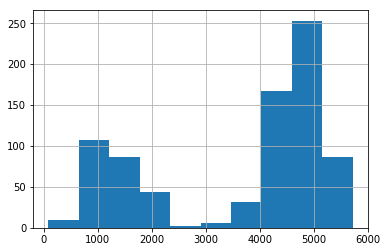

In [18]:
#Hist of data_daily
data_daily.hist()